# Сборный проект 1

__Описание проекта__
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\79184\\Desktop\\проекты\\консоли\\games.csv")
# чтение датасета и сохранение в переменной data

In [3]:
data_start = data
# переменная для подсчета процента отчищенных данных

In [4]:
data.head(5)
# вывод первых строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()
# общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()
# Основные значения датасета

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


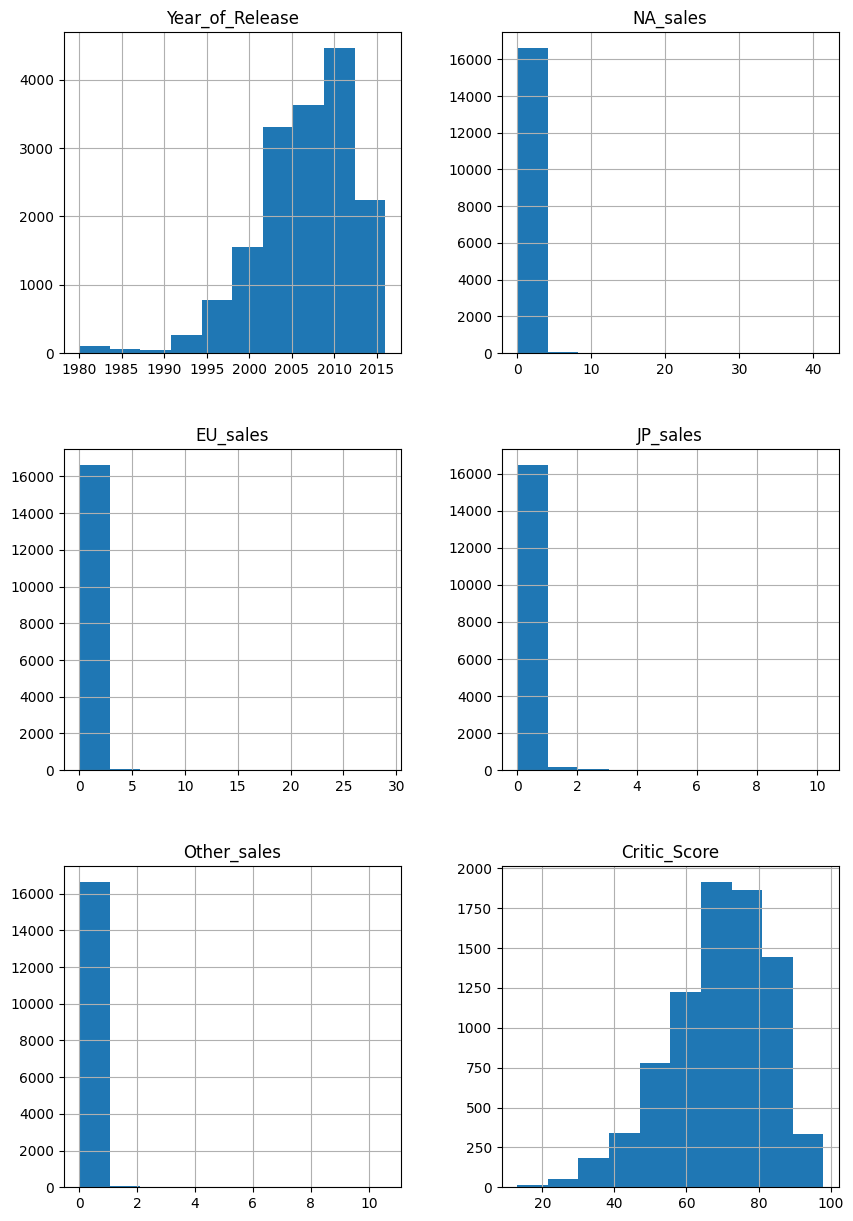

In [7]:
data.hist(figsize = (10, 15))
plt.show()

__Вывод__
+ Импортированы библиотеки
+ Датасет games.csv прочитан и сохранен в переменной data
+ Выведены общая иформация о датасете, основные значения, построены гистограммы 

## Подготовка данных

In [8]:
data.columns = data.columns.str.lower()
# приведение названий столбцов к нижнему регистру

In [9]:
data.duplicated().sum()
# проверка на дубликаты

0

In [10]:
data.isna().sum()
# вывод количества пропусков по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

___Удалим строки с пропусками в столбцах с именем, годом релиза и жанром в связи с их небольшим количеством___

In [11]:
data = data.dropna(subset = ['name', 'year_of_release', 'genre'])

___Выведем строки только с пропусками___

In [12]:
data_nan = data[data.isnull().any(axis=1)]
data_nan.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


__Пропуски в столбцах с оценкой пользователя/критика и рейтингом пропущены одновременно. Можно предложить, что это связано с другими системами рейтинга видеоигр PEGI — европейская рейтинговая система компьютерных и видеоигр и CERO — японская рейтинговая организация, в то время как столбец в датасете содержит информацию только из системы ESRB. А пропуски в столбцах с названием, жанром и годом могли получится при выгрузке данных или ошибках при вводе данных.__

In [13]:
data['user_score'].value_counts()
#data['critic_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.9       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

___В столбце с оценкой пользователя значение "tbd"(to be determined = будет определено) не несет в себе информации, поэтому можно сравнить его с пропуском и заменить на NaN. Пропуски в оценках критиков и пользователей заменять не будем, оставим NaN (при замене на 0 будут искажены графики)___

In [14]:
data = data.replace({'user_score':{'tbd':'NaN'}})

___Изменим тип данных в столбцах год релиза на цельночисленный тип, а в столбце с оценкой пользователя на тип данных с плавающей запятой (на такой же как и  в столбце с оценкой критиков)___

In [15]:
data = data.astype({"year_of_release":'int', "user_score": 'float'})

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

__Осталось определится с пропусками в столбце с рейтингом__

In [17]:
data['rating'].value_counts()
# Выводим количество строк с каждым видом рейтинга

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

+ Рейтинг АО (1 строка) - "Только для взрослых" добавим в рейтинг М - "Для взрослых". 
+ Рейтинг К-А ("Kids to Adults")(3 строки) то же самое что и рейтинг Е «Для всех». 
+ EC (8 строк)- данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E» - добавим в рейтинг "Е". 
+ Рейтинг RP (1 строка) - "Рейтинг ожидается" (1 строка) -  присвоим unknown как и пропускам

In [18]:
data.loc[data['rating'] == 'AO', 'rating'] = 'M'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'RP', 'rating'] = 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [19]:
clear_data = data
# переменная для подсчета процента отчищенных данных

In [20]:
100 - (clear_data.shape[0] / data_start.shape[0]) * 100
# Процент отчищенных данных

1.6212982351181608

__Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец__

In [21]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


__Вывод__
+ Заменены названия столбцов (приведены к нижнему регистру)
+ Датасет проверен на дубликаты (отсутствуют)
+ Преобразованы данные в нужные типы:в столбце год релиза на цельночисленный тип, а в столбце с оценкой пользователя на тип данных с плавающей запятой (на такой же как и в столбце с оценкой критиков)
+ Причинами, которые могли привести к пропускам  в столбцах с оценкой пользователя/критика и рейтингом (пропущены одновременно) могут быть другие системы рейтинга видеоигр PEGI — европейская рейтинговая система компьютерных и видеоигр и CERO — японская рейтинговая организация, в то время как столбец в датасете содержит информацию только из системы ESRB. А пропуски в столбцах с названием, жанром и годом могли получится при выгрузке данных или ошибках при вводе данных.
+ Обработаны пропуски в столбце "рейтинг": 
  + Рейтинг АО (1 строка) - "Только для взрослых" добавлен в рейтинг М - "Для взрослых". 
  + Рейтинг К-А ("Kids to Adults")(3 строки) то же самое что и рейтинг Е «Для всех». 
  + EC (8 строк)- данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E» - добавлен в рейтинг "Е". 
  + Рейтинг RP (1 строка) - "Рейтинг ожидается" (1 строка) -  присвоен unknown как и пропускам
+ В столбце с оценкой пользователя значение "tbd"(to be determined = будет определено) не несет в себе информации, поэтому можно сравнить его с пропуском и заменить на NaN. В пропусках в оценках критиков и пользователей оставлено  NaN
+ Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец 'all_sales'.
+ 1.62 - процент удаленных данных

## Исследовательский анализ данных

__Cколько игр выпускалось в разные годы?__

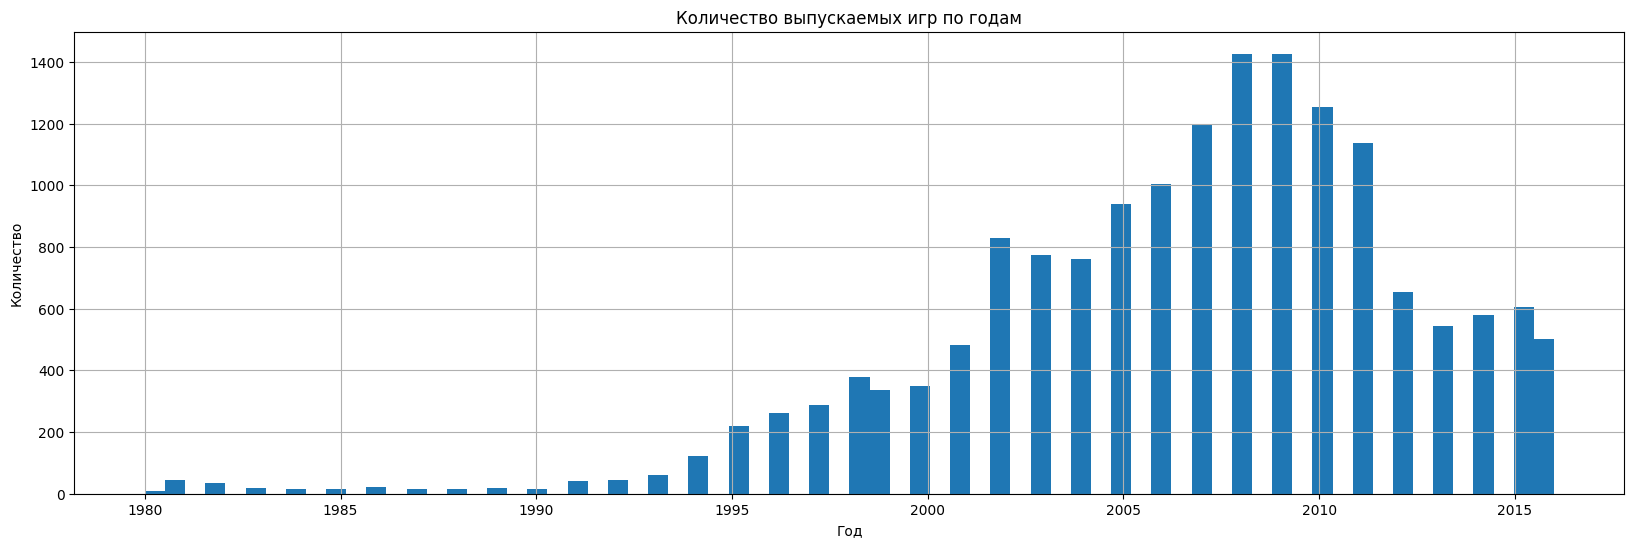

In [22]:
data['year_of_release'].hist(bins = 70, figsize = (20, 6), grid = True)
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

___Наибольшее количество игр выпущено в 2008 - 2009 годах (1427 и 1426 игр). В период с 1980 по 1993 количество выпускаемых игр не превышает 60 шт. в год. Это можно объяснить малым количеством компьютеров и консолей в данный временной промежуток, а также их недоступностью для широких масс. С 1994 года количество выпускаемых игр растет с каждым годом и уже с 1995 г ежегодно выпускается не менее 200 игр, однако с 2010 начинается спад выпуска и в период с 2012 по 2016 количество держится на уровне от 500 до 600 игр в год.___

In [23]:
data['year_of_release'].value_counts().head(3)

2008    1427
2009    1426
2010    1255
Name: year_of_release, dtype: int64

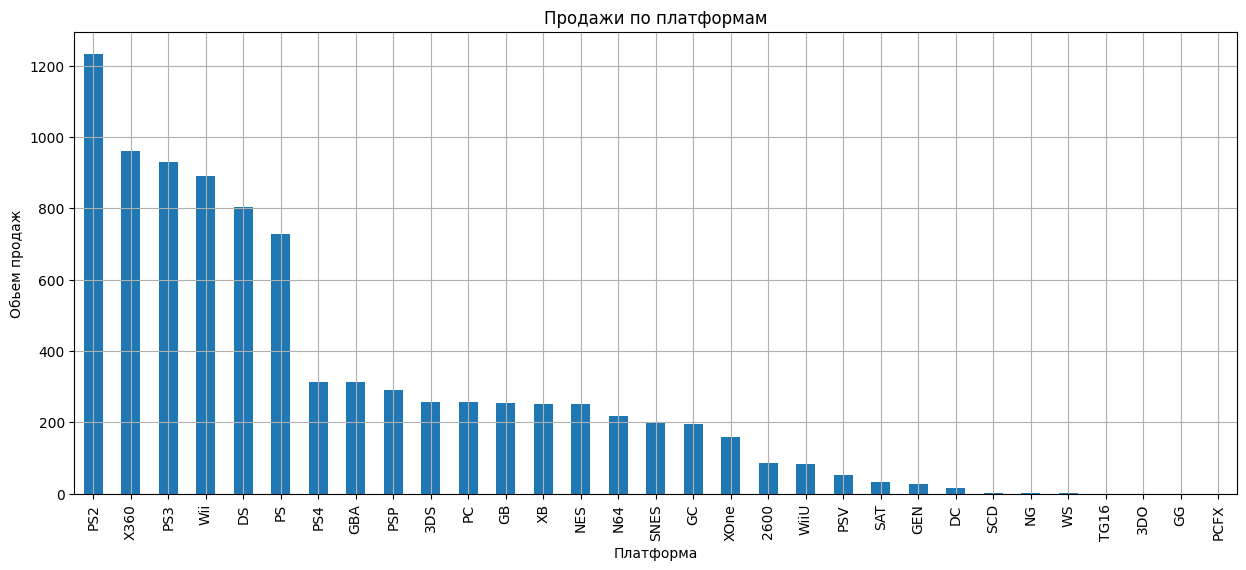

In [24]:
data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(
    by = 'all_sales', ascending = False).plot(kind = 'bar', figsize = (15, 6), grid = True,
                                              title = 'Продажи по платформам', xlabel = 'Платформа',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [25]:
data.pivot_table(
    index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


__Самой прибыльной платформой является PlayStation 2 (более 1200 млн.).  В остальных 5 наиболее прибыльных платформах (Xbox 360, PlayStation 3, Nintendo Wii и DS а также Playstation) продажи снижаются от 961 до 727 млн. Большая масса платформ (11 шт.) имеет продажи на уровне 200 - 300 млн. Оставшиеся платформы : 7 шт. - продажи менее 200 млн., остальные менее 1 млн.__

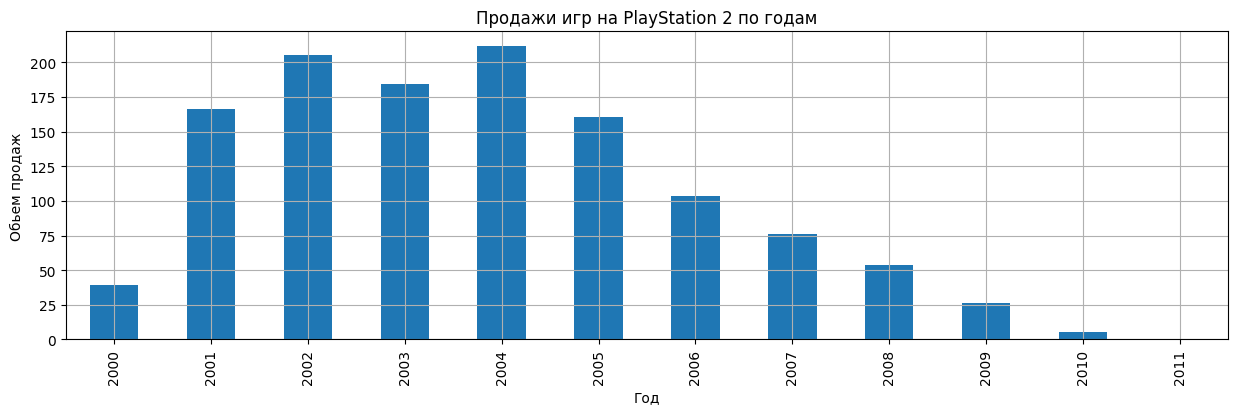

In [26]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на PlayStation 2 по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [27]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').head(5)

,all_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81


__Продажи игр на PS2 осуществлялись в течение 11 лет в период с 2000 по 2010 гг. и находились на уровне около 160 - 212 млн. Наиболее прибыльный период начался спустя год после начала продаж (с 2001 г.)  и продлился 5 лет (до 2005 г.), далее продажи пошли на спад.__

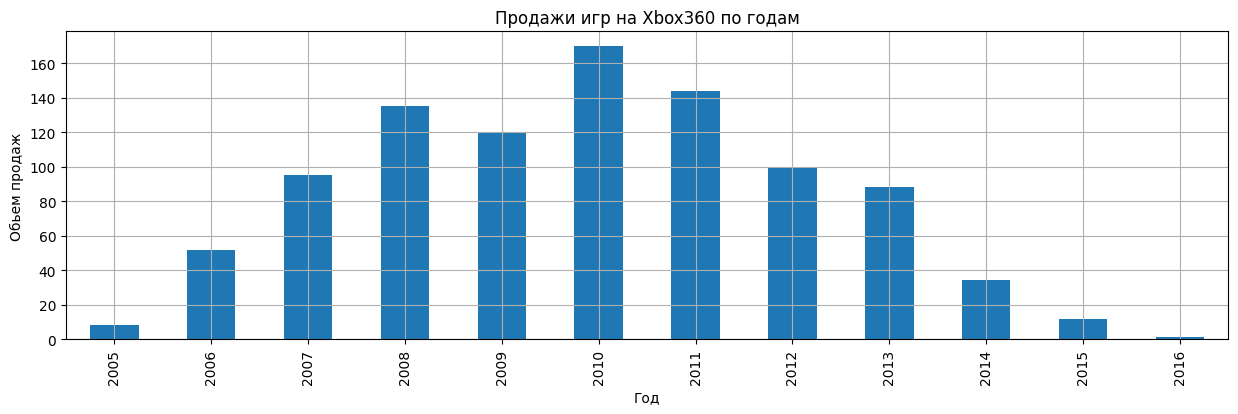

In [28]:
data.query('platform == "X360"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на Xbox360 по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [29]:
data.query('platform == "X360"').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
year_of_release,
2010,170.03
2011,143.84
2008,135.26
2009,120.29
2012,99.74


__На Xbox 360 игры продавались в течение 12 лет. В отличие от предыдушей консоли, данная модель постепенно набирала популярность. На 3 год продажи составляли около 100 млн. Самыми прибыльными годами являются 2010 (170 млн.) и 2011 (144 млн.) годы что приходится на середину промежутка ее продаж. С 2012 года продажи идут на спад, а в 2016 продажи почти прекратились.__

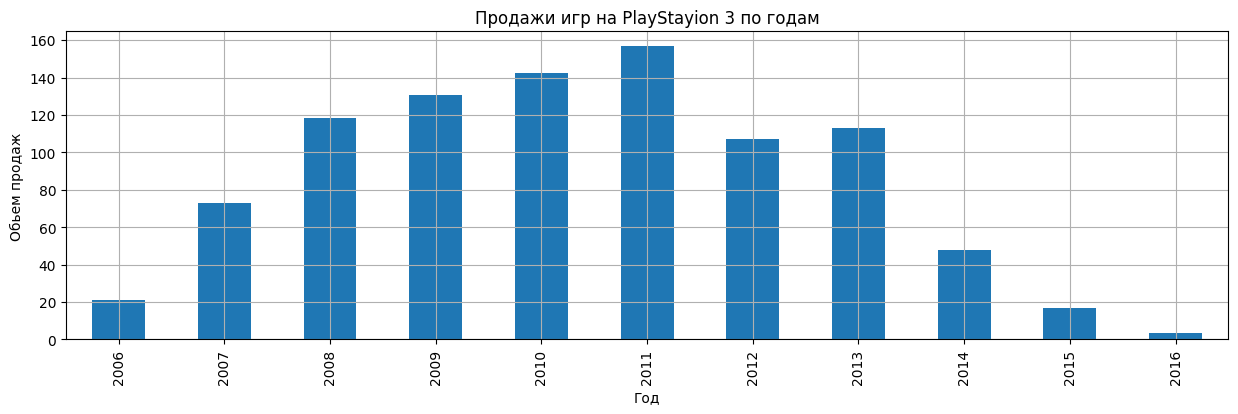

In [30]:
data.query('platform == "PS3"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на PlayStayion 3 по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [31]:
data.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
year_of_release,
2011,156.78
2010,142.17
2009,130.93
2008,118.52
2013,113.25


 __Продолжительность продаж так же как и предыдущей модели косоли Playstation  составляет 11 лет. Старт продаж начинается в 2006 г - момент начала спада продаж Playstation 2. Популярность игры на данную консоль приобретают на 3й год и стабильно держатся на уровне более 120 млн. вплоть до 2011 г, в котором продажи уже составляют около 157 млн. В следующие 2 года популярность немного cпадает, и уже с 2014 г. продажи уменьшаются более чем в половину. В 2016 г. продаж практически нет.__

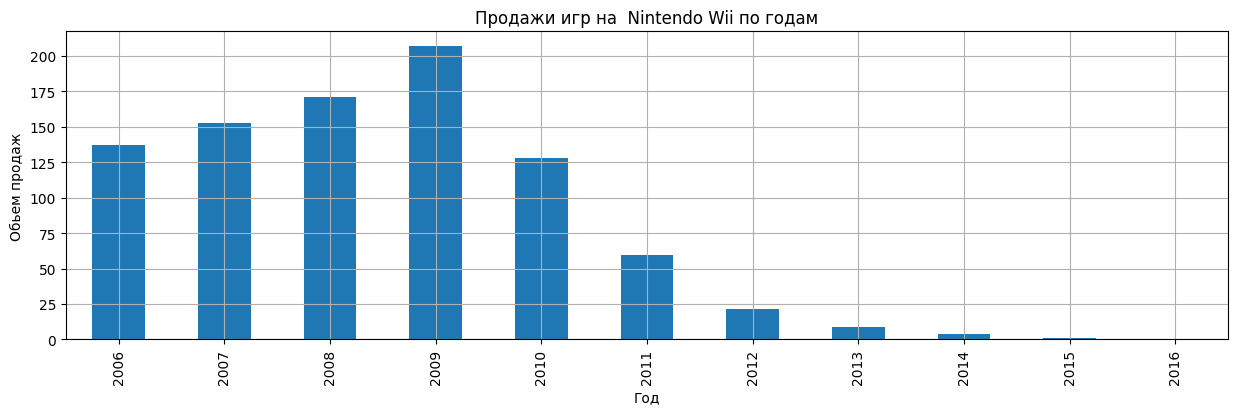

In [32]:
data.query('platform == "Wii"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на  Nintendo Wii по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [33]:
data.query('platform == "Wii"').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
year_of_release,
2009,206.97
2008,171.32
2007,152.77
2006,137.15
2010,127.95


__Следующими платформами являются 2 продукта Nintendo : Wii  и портативная DS. Продолжительность продаж игр на Nintendo Wii составляет 11 лет (c 2006 по 2016 гг.). Однако данная платформа с самого начала набирает популярность и на протяжении первых четырех лет продажи игр стабильно растут от 137 млн. до 207 млн. В 2010 году происходит резкий спад на 79.02 млн., продажи падают до конца периода продаж.__


__Следует отметить, что и у PS2 продажи начались в 2006 г., и несмотря на тот факт, что Нинтендо имело большую популярность в начале продаж, PS2 оказался более прибыльным продуктом.__

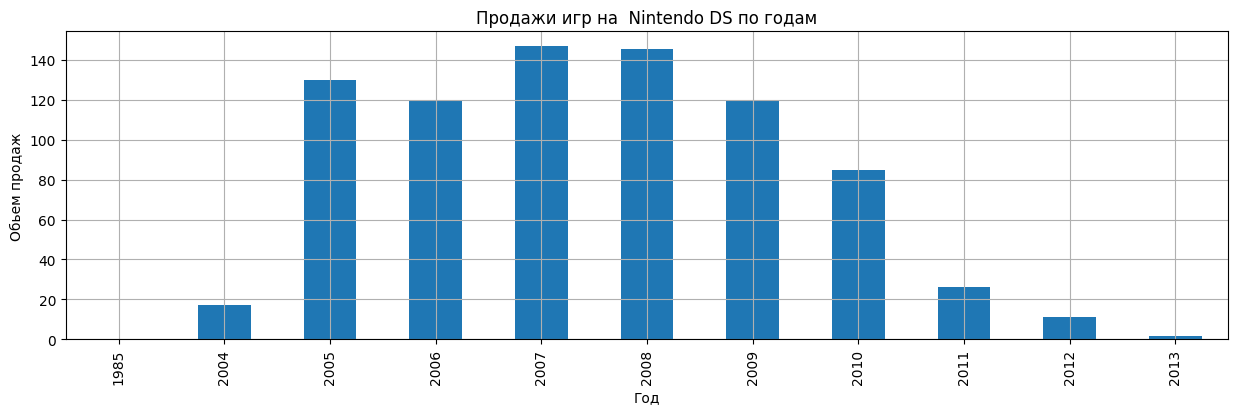

In [34]:
data.query('platform == "DS"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на  Nintendo DS по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [35]:
data.query('platform == "DS"').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
year_of_release,
2007,146.94
2008,145.31
2005,130.14
2006,119.81
2009,119.54


__Портативная Нинтендо набрала популярность спустя год начала продаж и пробыла на рынке в течение 10 лет (с 2004 по 2013 г.). Продажи игр на данную платформу составляли более 120 млн. в течение 5 лет. Самыми прибыльными годами были 2007 и 2008 гг. (147 и 145 млн.). С 2010 г. продажи идут на спад. 2011-2012 гг. продажи составляют менее 30 млн.__

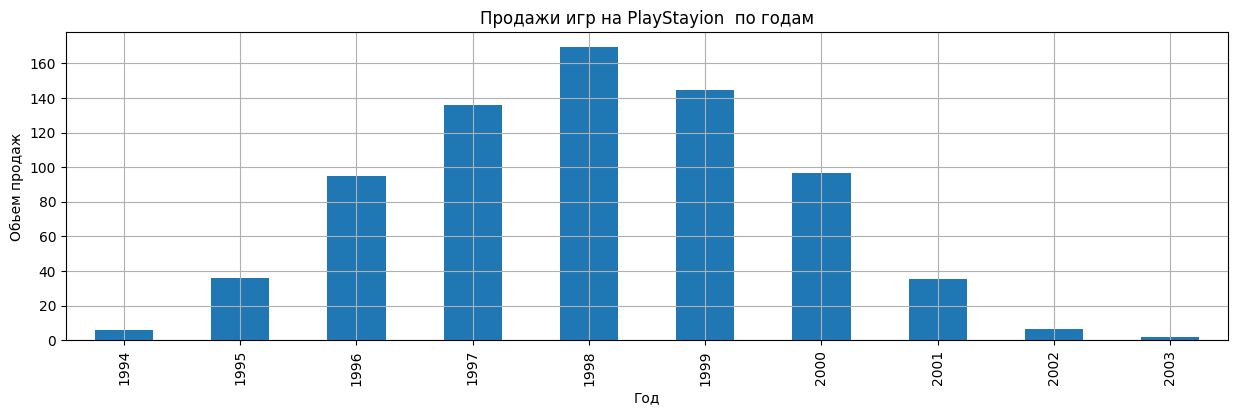

In [36]:
data.query('platform == "PS"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
    kind = 'bar',figsize = (15, 4), grid = True, title = 'Продажи игр на PlayStayion  по годам', xlabel = 'Год', 
    ylabel = 'Обьем продаж', legend = False)
plt.show()

In [37]:
data.query('platform == "PS"').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(5)

,all_sales
year_of_release,
1998,169.49
1999,144.53
1997,136.17
2000,96.37
1996,94.70


__Замыкает список лидеров еще один продукт PlayStation - первая PlayStation. Продажи осуществлялись с 1994 по 2003 гг. (10 лет). Популярность игры на данную платформу приобрели на 4 год продаж (1997 г. - 136 млн.). Пиком продаж стал 1998 г. - 169.5 млн. 1999 г. также являлся прибыльным - 136 млн. Далее продажи идут на спад и в 2002 платформа теряет популярность. Это обьясняется выходом следующей модели консоли PlayStation - PlayStation 2 и совпадает с началом периода популярности данной модели.__

 + __Итак, сколько игр выпускалось в разные годы?__

+ Наибольшее количество игр выпущено в 2008 - 2009 годах (1427 и 1426 игр). В период с 1980 по 1993 количество выпускаемых игр не превышает 60 шт. в год. Это можно объяснить малым количеством компьютеров и консолей в данный временной промежуток, а также их недоступностью для широких масс. С 1994 года количество выпускаемых игр растет с каждым годом и уже с 1995 г ежегодно выпускается не менее 200 игр, однако с 2010 начинается спад выпуска и в период с 2012 по 2016 количество держится на уровне от 500 до 600 игр в год.
+ Самой прибыльной платформой является PlayStation 2 (более 1200 млн.).  В остальных 5 наиболее прибыльных платформах (Xbox 360, PlayStation 3, Nintendo Wii и DS а также Playstation) продажи снижаются от 961 до 727 млн. Большая масса платформ (11 шт.) имеет продажи на уровне 200 - 300 млн. Оставшиеся платформы : 7 шт. - продажи менее 200 млн., остальные менее 1 млн.
+ Продажи игр на PS2 осуществлялись в течение 11 лет в период с 2000 по 2010 гг. и находились на уровне около 160 - 212 млн. Наиболее прибыльный период начался спустя год после начала продаж (с 2001 г.)  и продлился 5 лет (до 2005 г.), далее продажи пошли на спад.
+ На Xbox 360 игры продавались в течение 12 лет. В отличие от предыдушей консоли, данная модель постепенно набирала популярность. На 3 год продажи составляли около 100 млн. Самыми прибыльными годами являются 2010 (170 млн.) и 2011 (144 млн.) годы что приходится на середину промежутка ее продаж. С 2012 года продажи идут на спад, а в 2016 продажи почти прекратились.
+ Продолжительность продаж так же как и предыдущей модели косоли Playstation  составляет 11 лет. Старт продаж начинается в 2006 г - момент начала спада продаж Playstation 2. Популярность игры на данную консоль приобретают на 3й год и стабильно держатся на уровне более 120 млн. вплоть до 2011 г, в котором продажи уже составляют около 157 млн. В следующие 2 года популярность немного cпадает, и уже с 2014 г. продажи уменьшаются более чем в половину. В 2016 г. продаж практически нет.
+ Следующими платформами являются 2 продукта Nintendo : Wii  и портативная DS. Продолжительность продаж игр на Nintendo Wii составляет 11 лет (c 2006 по 2016 гг.). Однако данная платформа с самого начала набирает популярность и на протяжении первых четырех лет продажи игр стабильно растут от 137 млн. до 207 млн. В 2010 году происходит резкий спад на 79.02 млн., продажи падают до конца периода продаж.__
+ Следует отметить, что и у PS2 продажи начались в 2006 г., и несмотря на тот факт, что Нинтендо имело большую популярность в начале продаж, PS2 оказался более прибыльным продуктом.
+ Портативная Нинтендо набрала популярность спустя год начала продаж и пробыла на рынке в течение 10 лет (с 2004 по 2013 г.). Продажи игр на данную платформу составляли более 120 млн. в течение 5 лет. Самыми прибыльными годами были 2007 и 2008 гг. (147 и 145 млн.). С 2010 г. продажи идут на спад. 2011-2012 гг. продажи составляют менее 30 млн.
+ Замыкает список лидеров еще один продукт PlayStation - первая PlayStation. Продажи осуществлялись с 1994 по 2003 гг. (10 лет). Популярность игры на данную платформу приобрели на 4 год продаж (1997 г. - 136 млн.). Пиком продаж стал 1998 г. - 169.5 млн. 1999 г. также являлся прибыльным - 136 млн. Далее продажи идут на спад и в 2002 платформа теряет популярность. Это обьясняется выходом следующей модели консоли PlayStation - PlayStation 2 и совпадает с началом периода популярности данной модели.



___Исходя из анализа продаж игр на самые популярные платформы, продолжительность продаж обычно составлет 10 лет, из них 4-5 лет являются самыми прибыльными. Обычно попульрность игры на платформы набирают через год от старта продаж, однако Нинтендо Wii является исключением. Также выпуск следующей модели платформы обычно совпадает с периодом спада популярности предыдущей (прослеживается в продажах Playstation 1-3).___






__Актуальный период для построения прогноза на 2017 год.__

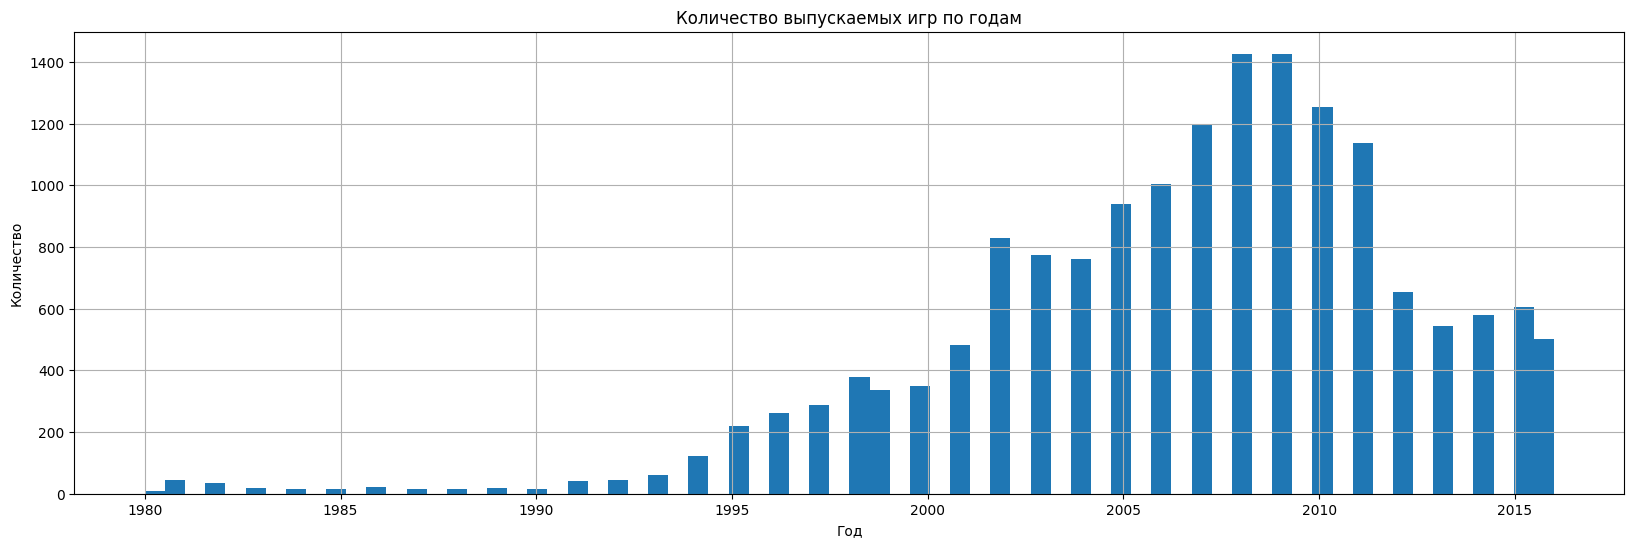

In [38]:
data['year_of_release'].hist(bins = 70, figsize = (20, 6), grid = True)
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

__Исходя их графика актуальным периодом для анализа будет являться период с 2014 по 2016 гг. (3 года). Данные в этом временном промежутке находятся примерно на одном уровне.__

In [39]:
actual_data = data.query("year_of_release >= 2014")
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


__Актуальные данные составляют 1689 строк__

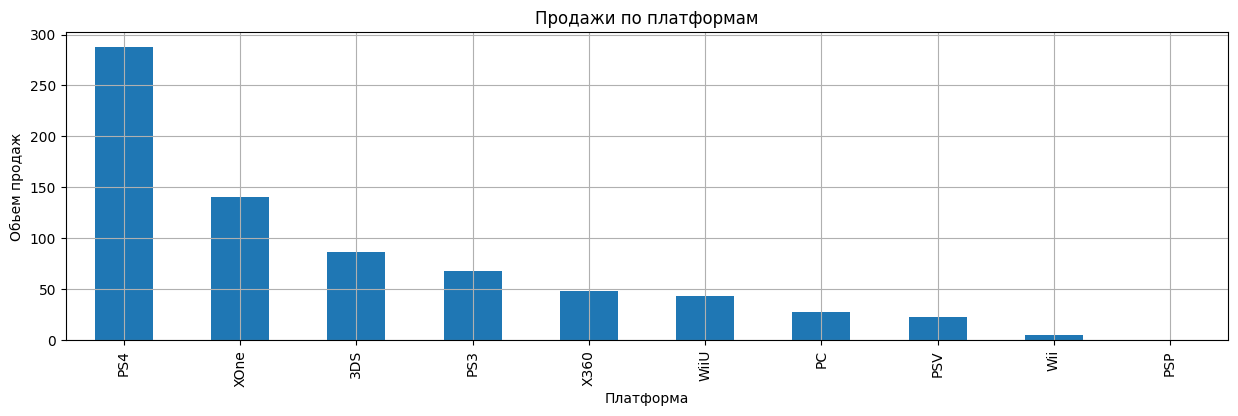

In [40]:
actual_data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(
    by = 'all_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по платформам', xlabel = 'Платформа',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [41]:
actual_data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(
    by = 'all_sales', ascending = False).head(5)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


__Тройку лидеров составляют PlayStation 4, XOne и 3DS. Продажи игр на данные консоли составляют 288, 140 и 87 млн.__

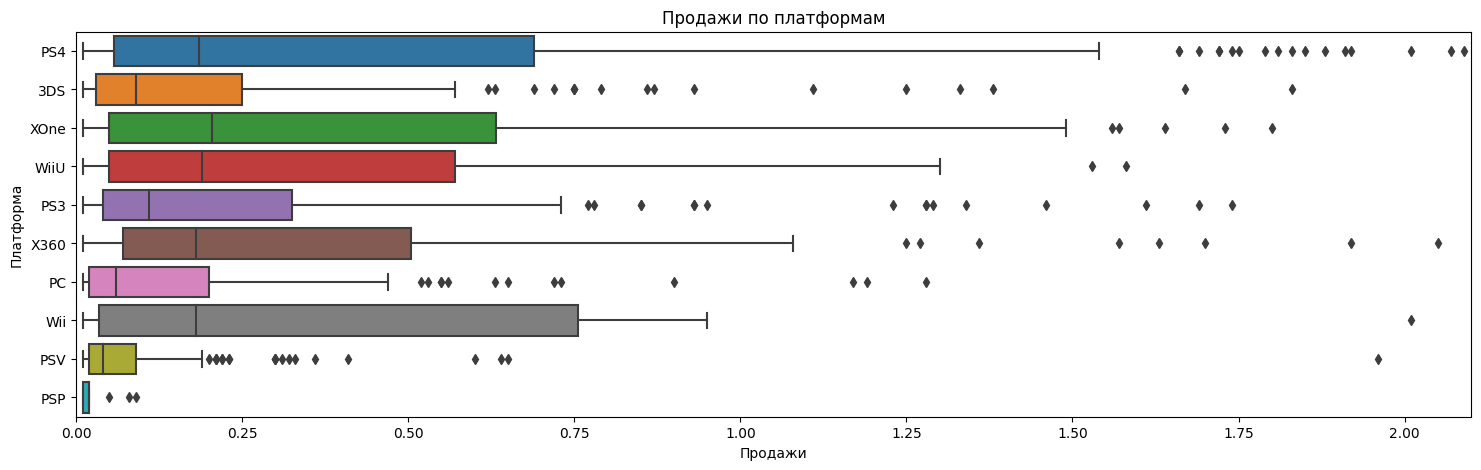

In [42]:
plt.figure(figsize=(18,5))
sns.boxplot(data=actual_data, x='all_sales', y='platform').set(
        title = 'Продажи по платформам', xlabel = 'Продажи', ylabel = 'Платформа')
plt.xlim(0, 2.1)
plt.show()

In [43]:
actual_data.pivot_table(index = 'platform', values = ['all_sales'], aggfunc = ['sum', 'median', 'mean'])

,sum,median,mean
,all_sales,all_sales,all_sales
platform,,,
3DS,86.68,0.090,0.408868
PC,27.05,0.060,0.179139
PS3,68.18,0.110,0.311324
PS4,288.15,0.185,0.766356
PSP,0.36,0.020,0.027692
PSV,22.40,0.040,0.075932
Wii,5.07,0.180,0.460909
WiiU,42.98,0.190,0.588767


__У всех платформ медиана меньше среднего значения и присутствуют "выбросы" значений. У Wii и X360 равны медианные значения. Самая большая медиана у XOne (0,205 млн.). Наибольшие максимальные значения у PS4 и XOne.__

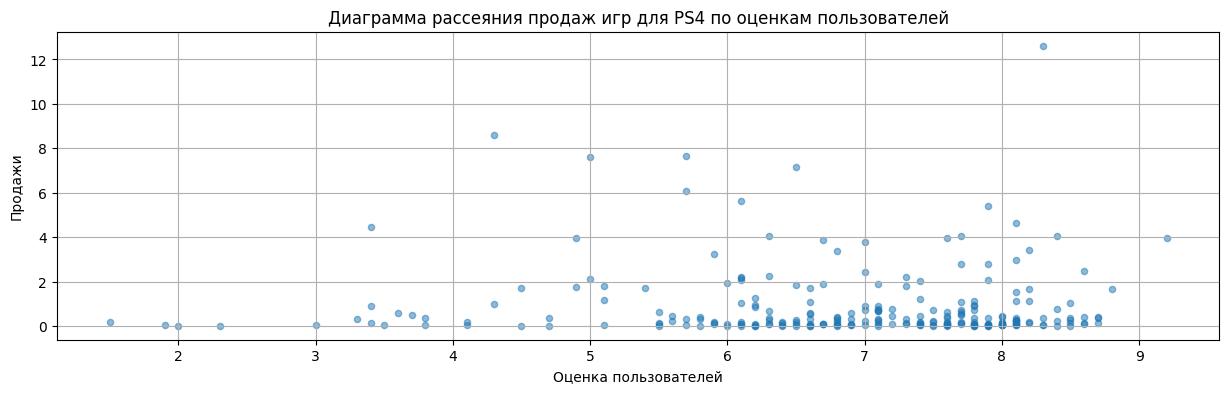

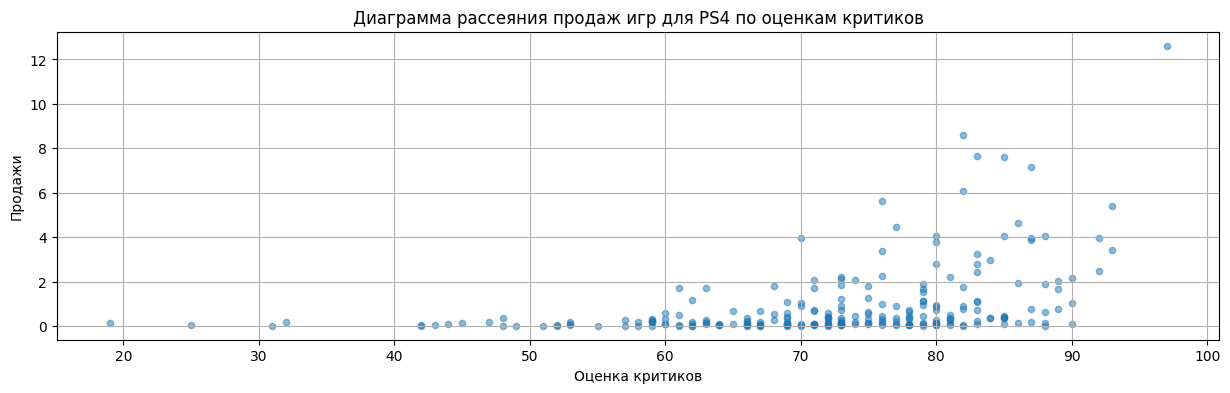

In [44]:
actual_data.query("platform == 'PS4'").plot(
    x = 'user_score', xlabel = 'Оценка пользователей', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для PS4 по оценкам пользователей')
actual_data.query("platform == 'PS4'").plot(
    x = 'critic_score', xlabel = 'Оценка критиков', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для PS4 по оценкам критиков')
plt.show()

In [45]:
actual_data.query("platform == 'PS4'")['all_sales'].corr(actual_data.query("platform == 'PS4'")['user_score'])
# коэфицент корреляции между продажами и оценкой пользователей

-0.04013158947269733

In [46]:
actual_data.query("platform == 'PS4'")['all_sales'].corr(actual_data.query("platform == 'PS4'")['critic_score'])
# коэфицент корреляции между продажами и оценкой критиков

0.40266141068104094

__Диаграммы рассеяния продажи игр для PS4 пользователей и критиков похожи, однако пользователи чаще ставят оценки ниже 5. Высоких оценок больше чем низких.  Коэфицент корреляции с оценками пользователей доказывает отсутствие взаимосвязи. С оценками критиков наблюдается небольшая линейная взаимосвязь (коэф.=0,4)__

__Построем такие же диаграммы и расчитаем коэфиценты корреляции для еще 2х лидирующих платформ.__

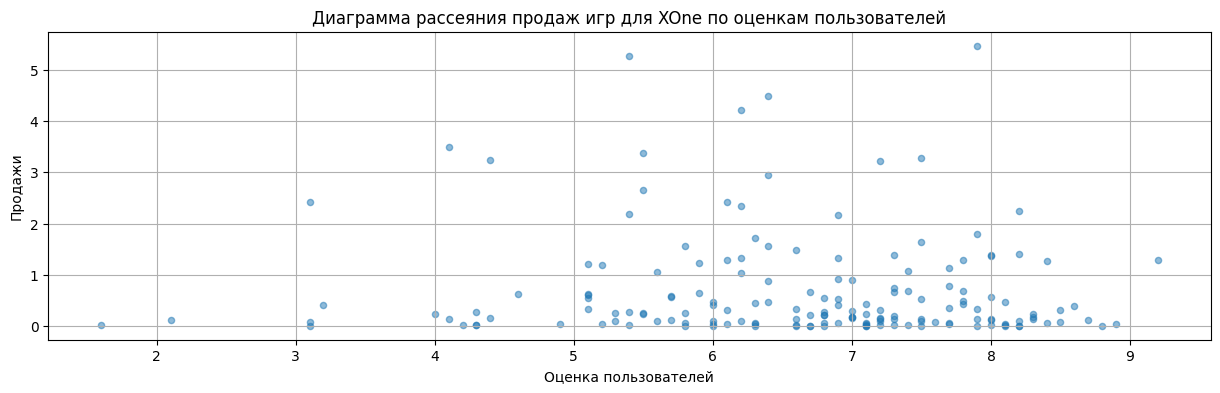

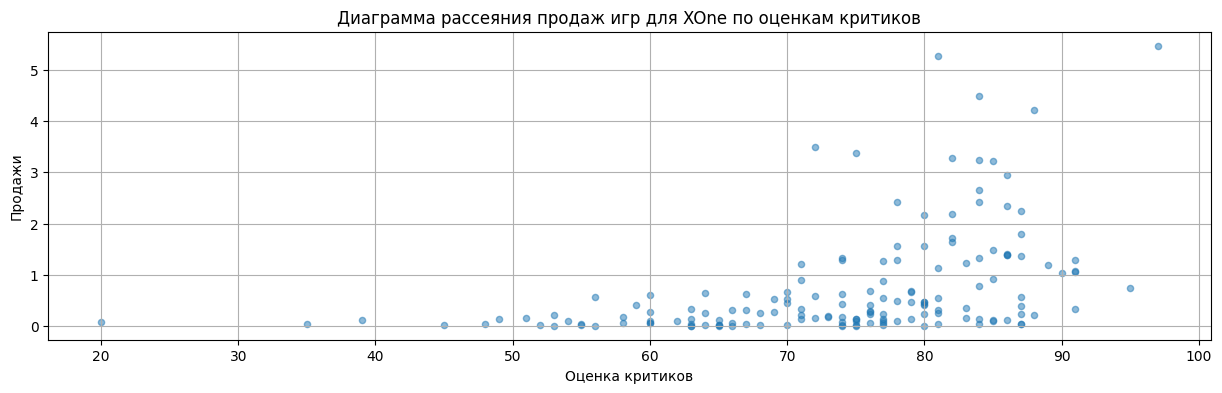

In [47]:
actual_data.query("platform == 'XOne'").plot(
    x = 'user_score', xlabel = 'Оценка пользователей', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для XOne по оценкам пользователей')
actual_data.query("platform == 'XOne'").plot(
    x = 'critic_score', xlabel = 'Оценка критиков', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для XOne по оценкам критиков')
plt.show()

In [48]:
actual_data.query("platform == 'XOne'")['all_sales'].corr(actual_data.query("platform == 'XOne'")['user_score'])
# коэфицент корреляции между продажами и оценкой пользователей

-0.07038392806475809

In [49]:
actual_data.query("platform == 'XOne'")['all_sales'].corr(actual_data.query("platform == 'XOne'")['critic_score'])
# коэфицент корреляции между продажами и оценкой критиков

0.42867694370333187

__Продажи игр на XOne также как и на PlayStation 4  имеют небольшую линейную взаимосвязь с оценками критиков и не имеют взаимосвязи с оценками пользователей (коэф.=0,43).__

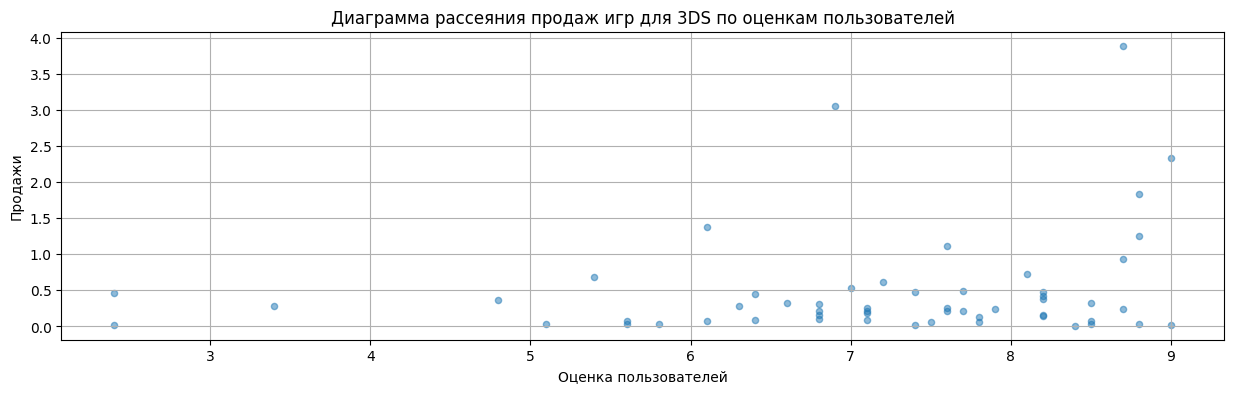

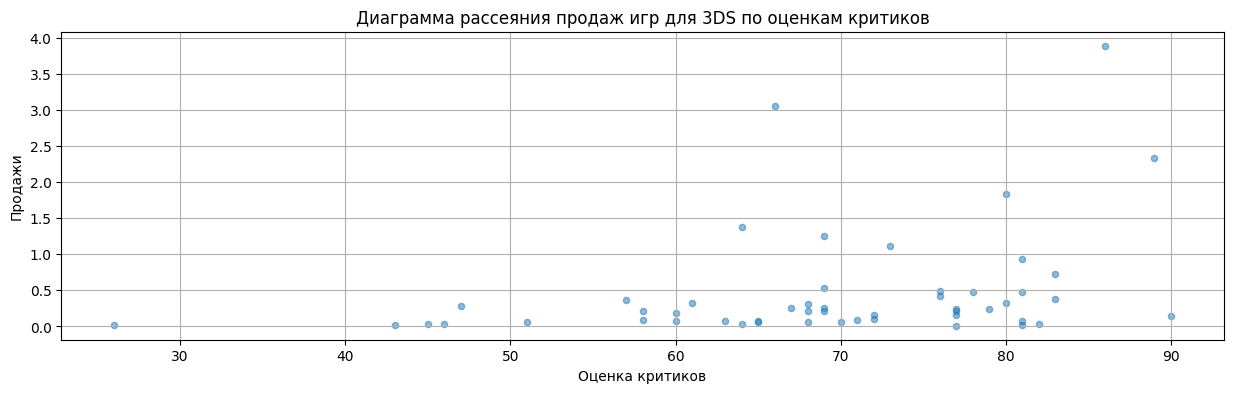

In [50]:
actual_data.query("platform == '3DS'").plot(
    x = 'user_score', xlabel = 'Оценка пользователей', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для 3DS по оценкам пользователей')
actual_data.query("platform == '3DS'").plot(
    x = 'critic_score', xlabel = 'Оценка критиков', y = 'all_sales',ylabel =  'Продажи', 
    kind = 'scatter', grid = True, figsize = (15, 4), alpha = 0.5,
    title = 'Диаграмма рассеяния продаж игр для 3DS по оценкам критиков')
plt.show()

In [51]:
actual_data.query("platform == '3DS'")['all_sales'].corr(actual_data.query("platform == '3DS'")['user_score'])
# коэфицент корреляции между продажами и оценкой пользователей

0.2151932718527028

In [52]:
actual_data.query("platform == '3DS'")['all_sales'].corr(actual_data.query("platform == '3DS'")['critic_score'])
# коэфицент корреляции между продажами и оценкой критиков

0.31411749286905105

__По результатам рассмотрения взамосвязи между оценками пользователей / критиков и продажами игр для 3х популярных платформ небольшая линейная взаимосвязь обнаружена с оценками критиков.__

__Общее распределение игр по жанрам:__

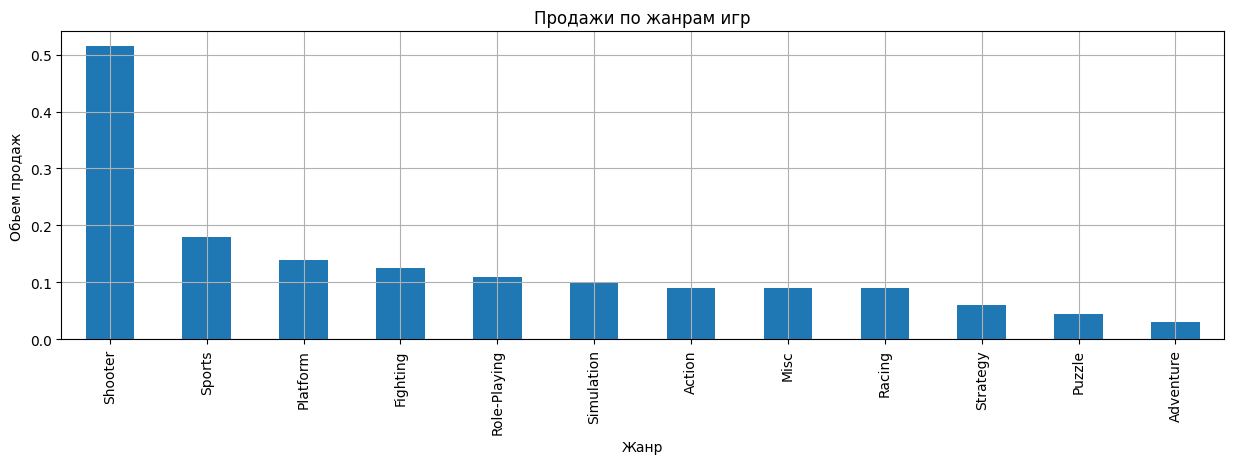

In [53]:
actual_data.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median').sort_values(
    by = 'all_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по жанрам игр', xlabel = 'Жанр',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [54]:
actual_data.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median').sort_values(
    by = 'all_sales', ascending = False).head(5)

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110


+ Первое место занимают шутеры 
+ Второе и третье место занимают спортивные игры и  платформеры
+ Червертое и пятое место занимают файтинги и ролевые игры 
+ Наименее прибыльными являются пазлы и приключения

__ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ__


+ Наибольшее количество игр выпущено в 2008 - 2009 годах (1427 и 1426 игр). В период с 1980 по 1993 количество выпускаемых игр не превышает 60 шт. в год. Это можно объяснить малым количеством компьютеров и консолей в данный временной промежуток, а также их недоступностью для широких масс. С 1994 года количество выпускаемых игр растет с каждым годом и уже с 1995 г ежегодно выпускается не менее 200 игр, однако с 2010 начинается спад выпуска и в период с 2012 по 2016 количество держится на уровне от 500 до 600 игр в год.
+ Самой прибыльной платформой является PlayStation 2 (более 1200 млн.).  В остальных 5 наиболее прибыльных платформах (Xbox 360, PlayStation 3, Nintendo Wii и DS а также Playstation) продажи снижаются от 961 до 727 млн. Большая масса платформ (11 шт.) имеет продажи на уровне 200 - 300 млн. Оставшиеся платформы : 7 шт. - продажи менее 200 млн., остальные менее 1 млн.
+ Продажи игр на PS2 осуществлялись в течение 11 лет в период с 2000 по 2010 гг. и находились на уровне около 160 - 212 млн. Наиболее прибыльный период начался спустя год после начала продаж (с 2001 г.)  и продлился 5 лет (до 2005 г.), далее продажи пошли на спад.
+ На Xbox 360 игры продавались в течение 12 лет. В отличие от предыдушей консоли, данная модель постепенно набирала популярность. На 3 год продажи составляли около 100 млн. Самыми прибыльными годами являются 2010 (170 млн.) и 2011 (144 млн.) годы что приходится на середину промежутка ее продаж. С 2012 года продажи идут на спад, а в 2016 продажи почти прекратились.
+ Продолжительность продаж так же как и предыдущей модели косоли Playstation  составляет 11 лет. Старт продаж начинается в 2006 г - момент начала спада продаж Playstation 2. Популярность игры на данную консоль приобретают на 3й год и стабильно держатся на уровне более 120 млн. вплоть до 2011 г, в котором продажи уже составляют около 157 млн. В следующие 2 года популярность немного cпадает, и уже с 2014 г. продажи уменьшаются более чем в половину. В 2016 г. продаж практически нет.
+ Следующими платформами являются 2 продукта Nintendo : Wii  и портативная DS. Продолжительность продаж игр на Nintendo Wii составляет 11 лет (c 2006 по 2016 гг.). Однако данная платформа с самого начала набирает популярность и на протяжении первых четырех лет продажи игр стабильно растут от 137 млн. до 207 млн. В 2010 году происходит резкий спад на 79.02 млн., продажи падают до конца периода продаж.__
+ Следует отметить, что и у PS2 продажи начались в 2006 г., и несмотря на тот факт, что Нинтендо имело большую популярность в начале продаж, PS2 оказался более прибыльным продуктом.
+ Портативная Нинтендо набрала популярность спустя год начала продаж и пробыла на рынке в течение 10 лет (с 2004 по 2013 г.). Продажи игр на данную платформу составляли более 120 млн. в течение 5 лет. Самыми прибыльными годами были 2007 и 2008 гг. (147 и 145 млн.). С 2010 г. продажи идут на спад. 2011-2012 гг. продажи составляют менее 30 млн.
+ Замыкает список лидеров еще один продукт PlayStation - первая PlayStation. Продажи осуществлялись с 1994 по 2003 гг. (10 лет). Популярность игры на данную платформу приобрели на 4 год продаж (1997 г. - 136 млн.). Пиком продаж стал 1998 г. - 169.5 млн. 1999 г. также являлся прибыльным - 136 млн. Далее продажи идут на спад и в 2002 платформа теряет популярность. Это обьясняется выходом следующей модели консоли PlayStation - PlayStation 2 и совпадает с началом периода популярности данной модели.
+ Продолжительность продаж обычно составлет 10 лет, из них 4-5 лет являются самыми прибыльными. Обычно попульрность игры на платформы набирают через год от старта продаж, однако Нинтендо Wii является исключением. Также выпуск следующей модели платформы обычно совпадает с периодом спада популярности предыдущей (прослеживается в продажах Playstation 1-3).
+ Актуальным периодом для прогноза на 2017 г. будет являться период с 2014 по 2016 гг. (3 года, 1689 строк).
+ Тройку лидеров в актуальном периоде составляют PlayStation 4, XOne и 3DS. Продажи игр на данные консоли составляют 288, 140 и 87 млн.
+ Из построенных "ящиков с усами" видно, что у всех платформ медиана меньше среднего значения и присутствуют "выбросы" значений. У Wii и X360 равны медианные значения. Самая большая медиана у XOne (0,205 млн.). Наибольшие максимальные значения у PS4 и XOne.
+ Диаграммы рассеяния продажи игр для PlayStation 4 пользователей и критиков в актуальном периоде похожи, однако пользователи чаще ставят оценки ниже 5. Высоких оценок больше чем низких.  Коэфицент корреляции с оценками пользователей доказывает отсутствие взаимосвязи. С оценками критиков наблюдается небольшая линейная взаимосвязь (коэф.=0,4). Аналогичны результаты для XOne и 3DS.  По результатам рассмотрения взамосвязи между оценками пользователей / критиков и продажами игр для 3х популярных платформ небольшая линейная взаимосвязь обнаружена с оценками критиков.
+ В актуальном периоде жанр игр влияет на их продажи :
  + Первое место занимают шутеры 
  + Второе и третье место занимают спортивные игры и  платформеры
  + Четвертое и пятое место занимают файтинги и ролевые игры 
  + Наименее прибыльными являются пазлы и приключения

## Портрет пользователя каждого региона

__Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)__

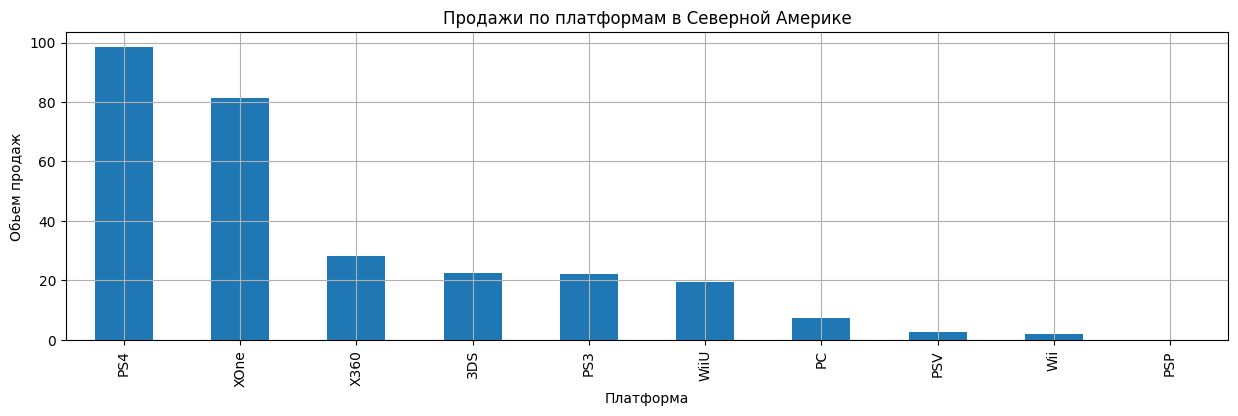

In [55]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по платформам в Северной Америке', xlabel = 'Платформа',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [56]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


__Наибольшую популярность в Северной Америке имеют игры на PS4 (98,6 млн.), второе место XOne (81 млн.), третье у X360 (28 млн.).
На четвертом и пятом 3DS и PS3 (22,6 и 22 млн.) . Совсем не пользуются популярность Wii и PSP.__

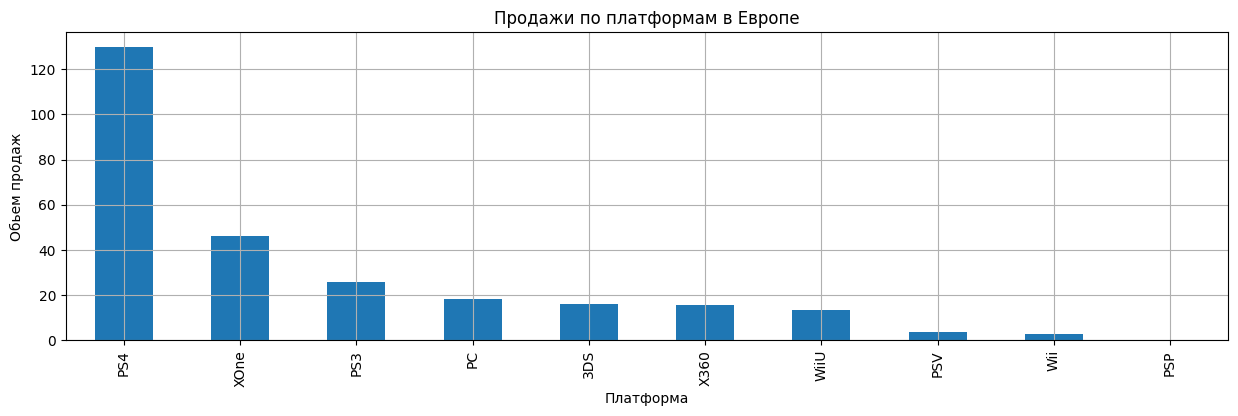

In [57]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по платформам в Европе', xlabel = 'Платформа',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [58]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


__Предпочтения европейских пользователей практически не отличаются от американских. Первое место занимает PS4 (130 млн.). 2е и 3е XOne и PS3 (46 и 25,5 млн.). Также европейцы играют на ПК - 4е место (18 млн.) и 3DS (16 млн, 5е место).
Также как и в Северной америке непопулярны Wii и PSP.__

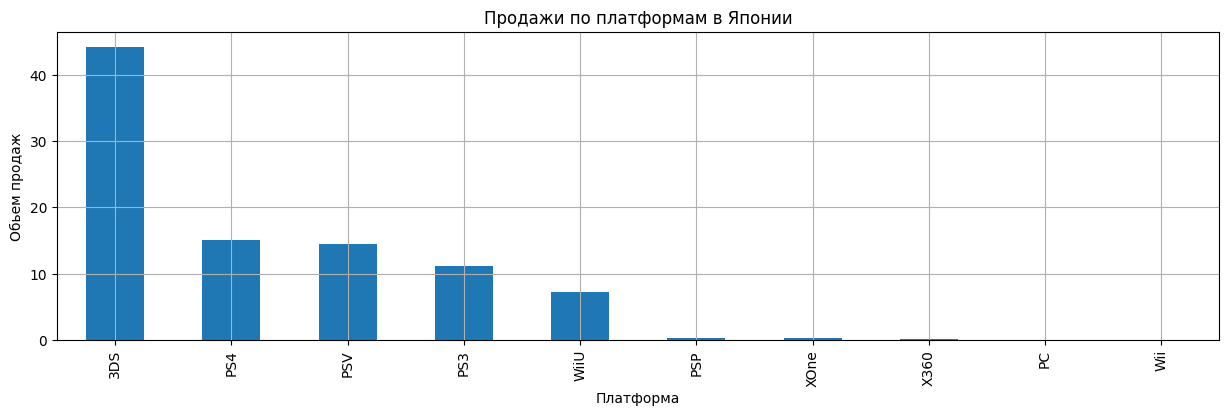

In [59]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по платформам в Японии', xlabel = 'Платформа',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [60]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


__Портрет пользователей в Японии разительно отличается от европейцев и американцев, Xbox в Японии играют еденицы. Абсолютным лидером является платформа 3DS (44 млн.). 2е, 3е и 4е места у платформ PlayStation (PS4, PSV и PS3 - 15, 14.5 и 11 млн.). Платформа WiiU на 5м месте (7 млн.). Не пользуются спросом PC и Wii.__

__Самые популярные жанры (топ-5) по регионам__

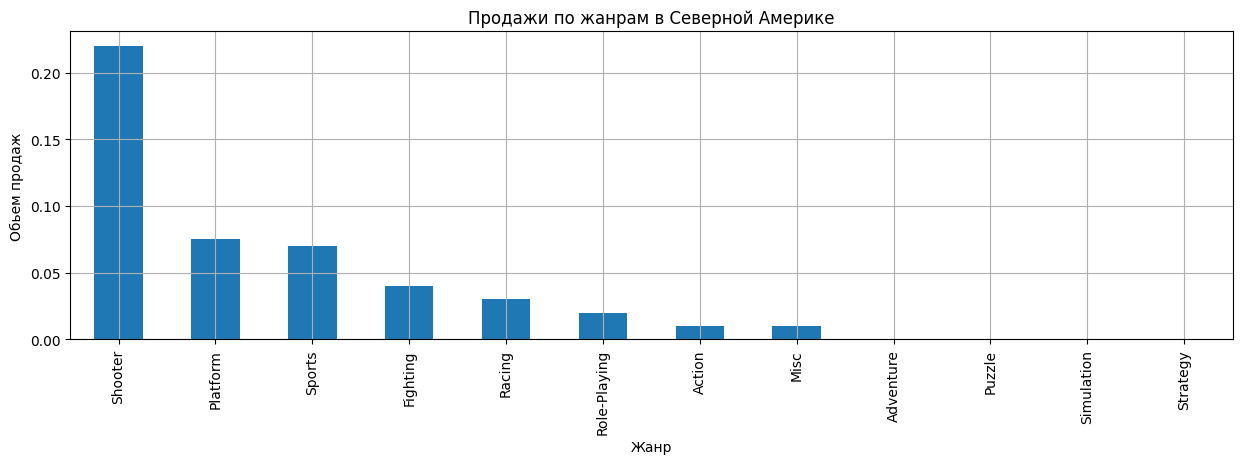

In [61]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(
    by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по жанрам в Северной Америке', xlabel = 'Жанр',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [62]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(
    by = 'na_sales', ascending = False).head(5)

,na_sales
genre,
Shooter,0.220
Platform,0.075
Sports,0.070
Fighting,0.040
Racing,0.030


__Самыми попульрными жанрами у североамериканских пользователей являются "шутеры" и "платформеры", на 3м месте "спорт", 4е и 5е место у "файтингов" и "гонок". Не пользуются популярностью "приключения, "стратегии" и "пазлы" и "симуляторы".__

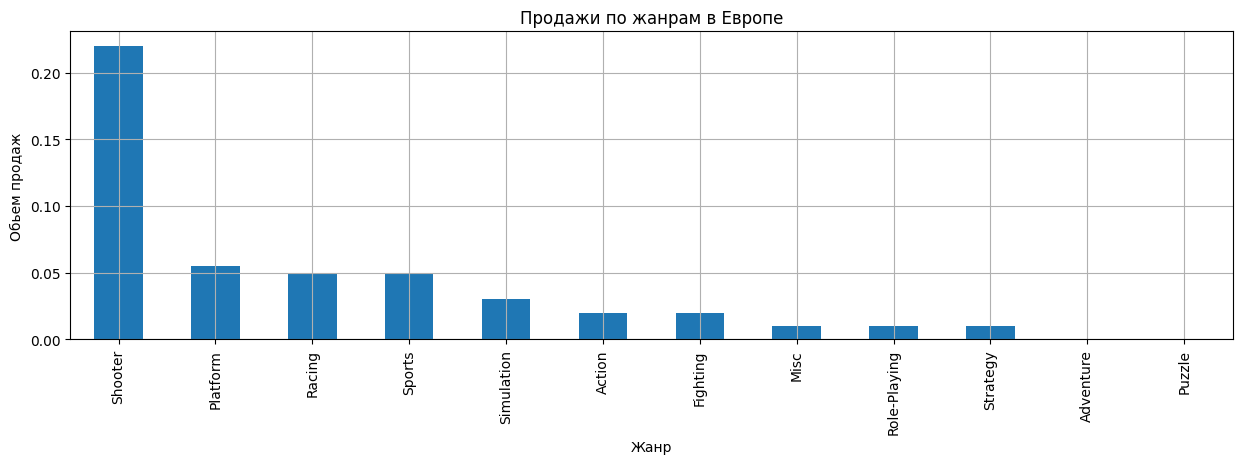

In [63]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(
    by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по жанрам в Европе', xlabel = 'Жанр',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [64]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(
    by = 'eu_sales', ascending = False).head(5)

,eu_sales
genre,
Shooter,0.220
Platform,0.055
Racing,0.050
Sports,0.050
Simulation,0.030


__Европейцы имеют практически идентичные вкусы на игры. Исключение составляют "симуляторы" , тогда как у американцев в топ-5 жанров на их месте "файтинги"__

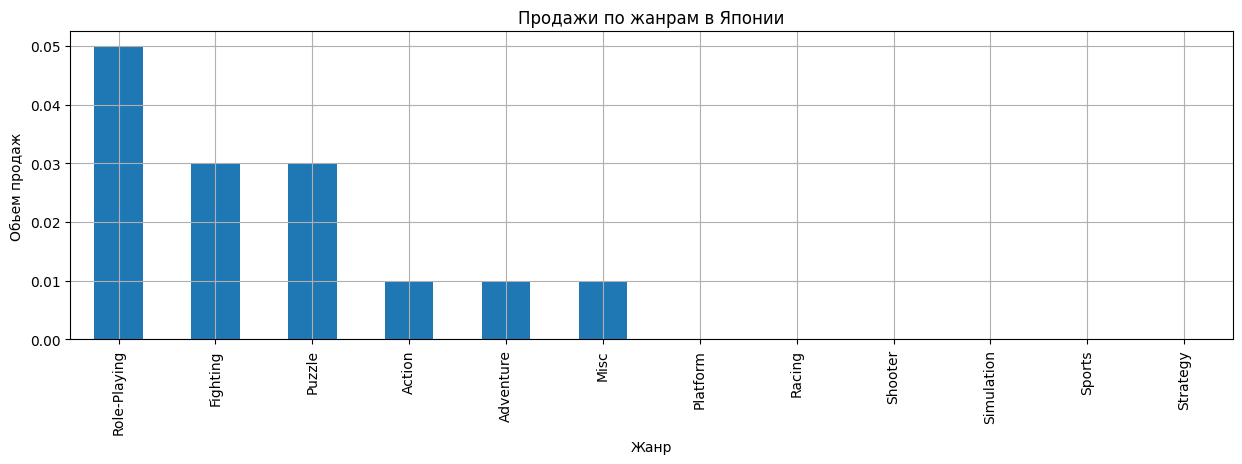

In [65]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(
    by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (15, 4), grid = True,
                                              title = 'Продажи по жанрам в Японии', xlabel = 'Жанр',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [66]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(
    by = 'jp_sales', ascending = False).head(5)

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Puzzle,0.03
Action,0.01
Adventure,0.01


__Японские пользователи как и при выборе платформы полностью отличаются предпочтениями в жанрах от европейцев и американцев. Лидируют - "ролевые игры", а самый популярный в других регионах"экшн" уже на 4м месте. "Файтинги"  и "пазлы" занимают 2е и 3е место, причем в пазлы из 3х регионов играют только в Японии. Также японцы предпочитают "приключения" в которые не играют в 2х других регионах.__

__Влияет ли рейтинг ESRB на продажи в отдельном регионе?__

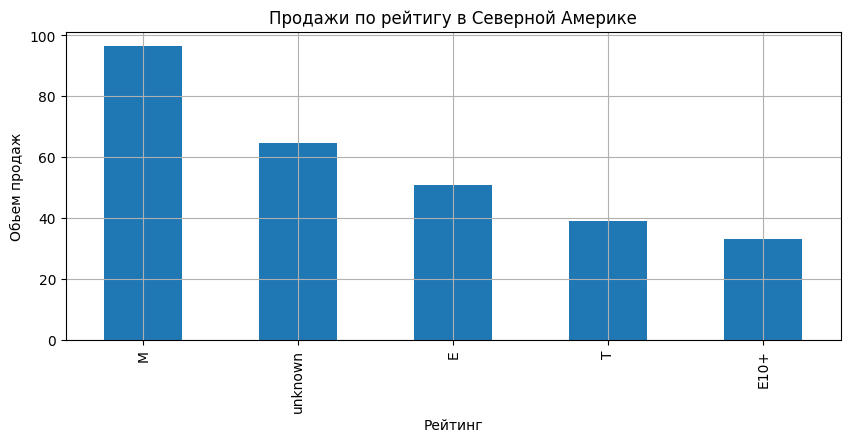

In [67]:
actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (10, 4), grid = True,
                                              title = 'Продажи по рейтигу в Северной Америке', xlabel = 'Рейтинг',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [68]:
actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).head()

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


__Североамериканские пользоватери предпочитают игры "для взрослых" - "М" (96 млн.). В половину менее популярны и находятся на 3м месте игры для всех возрастов (51 млн.). 4е и 5е места у игр «Для всех от 10 лет и старше» и игры для подростков (39 и 33 млн.). У игр неизвестной категории скорее всего пропущена категория т.к. рейтинг ЕSRB используется в США, Мексике и Канаде или игра не не проходила рецензирования ESRB.__

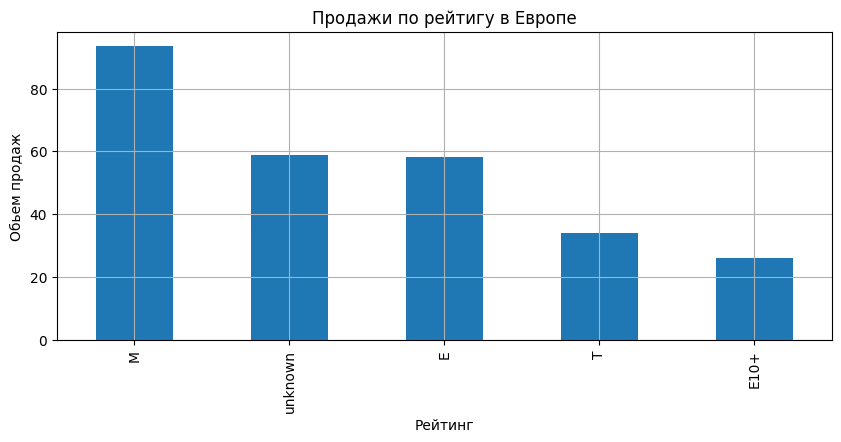

In [69]:
actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10, 4), grid = True,
                                              title = 'Продажи по рейтигу в Европе', xlabel = 'Рейтинг',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [70]:
actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).head()

,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


__Схожий выбор у европейцев. Разница лишь в обьемах продаж. Игры с неизвестным жанром имеют прибыль в 59 млн. Однако из-за системы рейтинга PEGI применяемой в Европе нельзя быть уверенными, в какие категории входят данные игры.__

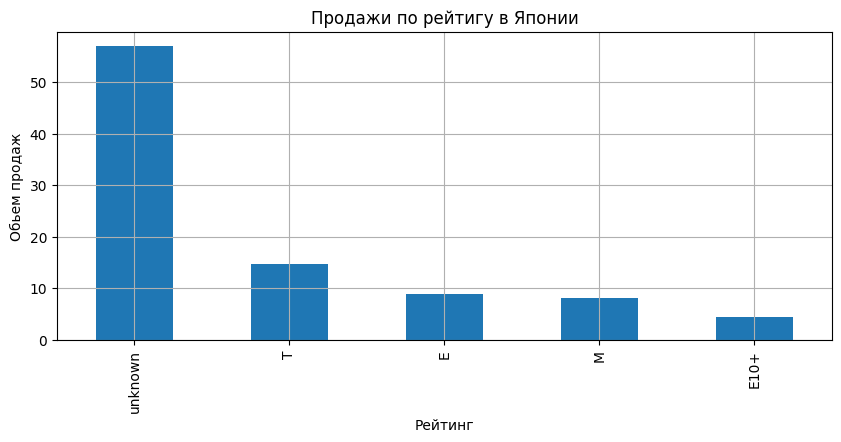

In [71]:
actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10, 4), grid = True,
                                              title = 'Продажи по рейтигу в Японии', xlabel = 'Рейтинг',
                                              ylabel = 'Обьем продаж', legend = False)
plt.show()

In [72]:
actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).head()

,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


__Игры "для подростков" лидируют в Японии (15 млн.). 2е и 3е место  у игр "для всех возрастов" и "взрослых" игр (9 и 8 млн.). 4е  место занимают игры «Для всех от 10 лет и старше»(4 млн.). Прибыль от игр с неизвестным жанром составляет 57 млн.(больше половины от всей прибыли региона), и, так же как и Европе в данном регионе применяют свою систему рейтинга CERO, что не позволяет достоверно оценить распределение предпочтений японцев.__

__ВЫВОДЫ ПО ПОРТРЕТАМ ПОЛЬЗОВАТЕЛЕЙ РАЗНЫХ РЕГИОНОВ:__


__Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)__
+ Наибольшую популярность в Северной Америке имеют игры на PS4 (98,6 млн.), второе место XOne (81 млн.), третье у X360 (28 млн.). На четвертом и пятом 3DS и PS3 (22,6 и 22 млн.) . Совсем не пользуются популярность Wii и PSP.
+ Предпочтения европейских пользователей практически не отличаются от американских. Первое место занимает PS4 (130 млн.). 2е и 3е XOne и PS3 (46 и 25,5 млн.). Также европейцы играют на ПК - 4е место (18 млн.) и 3DS (16 млн, 5е место).Также как и в Северной америке непопулярны Wii и PSP.
+ Портрет пользователей в Японии разительно отличается от европейцев и американцев, Xbox в Японии играют еденицы. Абсолютным лидером является платформа 3DS (44 млн.). 2е, 3е и 4е места у платформ PlayStation (PS4, PSV и PS3 - 15, 14.5 и 11 млн.). Платформа WiiU на 5м месте (7 млн.). Не пользуются спросом PC и Wii.



__Самые популярные жанры (топ-5) по регионам__
+ Самыми попульрными жанрами у североамериканских пользователей являются "шутеры" и "платформеры", на 3м месте "спорт", 4е и 5е место у "файтингов" и "гонок". Не пользуются популярностью "приключения, "стратегии" и "пазлы" и "симуляторы".
+ Европейцы имеют практически идентичные вкусы на игры. Исключение составляют "симуляторы" , тогда как у американцев в топ-5 жанров на их месте "файтинги"
+ Японские пользователи как и при выборе платформы полностью отличаются предпочтениями в жанрах от европейцев и американцев. Лидируют - "ролевые игры", а самый популярный в других регионах"экшн" уже на 4м месте. "Файтинги"  и "пазлы" занимают 2е и 3е место, причем в пазлы из 3х регионов играют только в Японии. Также японцы предпочитают "приключения" в которые не играют в 2х других регионах.

__Влияет ли рейтинг ESRB на продажи в отдельном регионе?__
+ Североамериканские пользоватери предпочитают игры "для взрослых" - "М" (96 млн.). В половину менее популярны и находятся на 3м месте игры для всех возрастов (51 млн.). 4е и 5е места у игр «Для всех от 10 лет и старше» и игры для подростков (39 и 33 млн.). У игр неизвестной категории скорее всего пропущена категория т.к. рейтинг ЕSRB используется в США, Мексике и Канаде или игра не не проходила рецензирования ESRB.
+ Схожий выбор у европейцев. Разница лишь в обьемах продаж. Игры с неизвестным жанром имеют прибыль в 59 млн. Однако из-за системы рейтинга PEGI применяемой в Европе нельзя быть уверенными, в какие категории входят данные игры.
+ Игры "для подростков" лидируют в Японии (15 млн.). 2е и 3е место  у игр "для всех возрастов" и "взрослых" игр (9 и 8 млн.). 4е  место занимают игры «Для всех от 10 лет и старше»(4 млн.). Прибыль от игр с неизвестным жанром составляет 57 млн.(больше половины от всей прибыли региона), и, так же как и Европе в данном регионе применяют свою систему рейтинга CERO, что не позволяет достоверно оценить распределение предпочтений японцев.

__Рейтинг ESRB достоверен только для Северной Америки. Для Японии и Европы слишком много неизвестных рейтингов с большим обьемом прибыли.__



__Североамериканский пользователь  как и европеец играет на PS4 в "шутеры" и "платформеры" с рейтингом для "взрослых"__

__Японец играет на 3DS в "ролевые игры" для всех возрастов.__


## Проверьте гипотезы

__5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var)

__Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны__



__Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны__

In [73]:
xone_data = actual_data.query('platform == "XOne"')['user_score'].dropna()
pc_data = actual_data.query('platform == "PC"')['user_score'].dropna()

In [74]:
len(xone_data)

165

In [75]:
len(pc_data)

122

In [76]:
xone_data.var()

1.8910066518847013

In [77]:
pc_data.var()

2.901154315133451

__Размеры выборок Xbox One и PC не равны (165 и 122) и дисперсии разные(equal_var = False)___

In [78]:
alpha = 0.05
results = st.ttest_ind(
    xone_data, 
    pc_data,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


__Не получилось отвергнуть нулевую гипотезу.__

__5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные__

__Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны__



__Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports не равны__

In [79]:
action_data = actual_data.query("genre == 'Action'")['user_score'].dropna()
sport_data = actual_data.query("genre == 'Sports'")['user_score'].dropna()

In [80]:
len(action_data)

297

In [81]:
len(sport_data)

127

In [82]:
action_data.var()

1.8984766584766581

In [83]:
sport_data.var()

3.446979127609048

__Размеры выборок "экшн" и "спорт" не равны (297 и 129) и дисперсии разные(equal_var = False)__

In [84]:
alpha = 0.05
results = st.ttest_ind(
    action_data, 
    sport_data,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


__Отвергаем нулевую гипотезу.__

__ВЫВОД ПО ПРОВЕРКЕ ГИПОТЕЗ:__

+ Не получилось отвергнуть нулевую гипотезу (Средние пользовательские рейтинги платформ Xbox One и PC равны).
+ Нулевая гипотеза (Средние пользовательские рейтинги жанров Action и Sports равны) отвергнута.

## Общий вывод

__1. Открыт файл с данными и изучена общая информация__
+ Датасет games.csv прочитан и сохранен в переменной data
+ Выведены общая иформация о датасете, основные значения, построены гистограммы 

__2. Подготовлены данные__
+ Заменены названия столбцов (приведены к нижнему регистру)
+ Датасет проверен на дубликаты (отсутствуют)
+ Преобразованы данные в нужные типы:в столбце год релиза на цельночисленный тип, а в столбце с оценкой пользователя на тип данных с плавающей запятой (на такой же как и в столбце с оценкой критиков)
+ Обработаны пропуски в столбце "рейтинг": 
  + Рейтинг АО (1 строка) - "Только для взрослых" добавлен в рейтинг М - "Для взрослых". 
  + Рейтинг К-А ("Kids to Adults")(3 строки) то же самое что и рейтинг Е «Для всех». 
  + EC (8 строк)- данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E» - добавлен в рейтинг "Е". 
  + Рейтинг RP (1 строка) - "Рейтинг ожидается" (1 строка) -  присвоен unknown как и пропускам
+ В столбце с оценкой пользователя значение "tbd"(to be determined = будет определено) не несет в себе информации, поэтому можно сравнить его с пропуском и заменить на NaN. В пропусках в оценках критиков и пользователей оставлено  NaN
+ Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец 'all_sales'.
+ 1.62 - процент удаленных данных

__3. Проведен исследовательский анализ данных__

+ Наибольшее количество игр выпущено в 2008 - 2009 годах (1427 и 1426 игр). В период с 1980 по 1993 количество выпускаемых игр не превышает 60 шт. в год. Это можно объяснить малым количеством компьютеров и консолей в данный временной промежуток, а также их недоступностью для широких масс. С 1994 года количество выпускаемых игр растет с каждым годом и уже с 1995 г ежегодно выпускается не менее 200 игр, однако с 2010 начинается спад выпуска и в период с 2012 по 2016 количество держится на уровне от 500 до 600 игр в год.
+ Самой прибыльной платформой является PlayStation 2 (более 1200 млн.).  В остальных 5 наиболее прибыльных платформах (Xbox 360, PlayStation 3, Nintendo Wii и DS а также Playstation) продажи снижаются от 961 до 727 млн. Большая масса платформ (11 шт.) имеет продажи на уровне 200 - 300 млн. Оставшиеся платформы : 7 шт. - продажи менее 200 млн., остальные менее 1 млн.
+ Продажи игр на PS2 осуществлялись в течение 11 лет в период с 2000 по 2010 гг. и находились на уровне около 160 - 212 млн. Наиболее прибыльный период начался спустя год после начала продаж (с 2001 г.)  и продлился 5 лет (до 2005 г.), далее продажи пошли на спад.
+ На Xbox 360 игры продавались в течение 12 лет. В отличие от предыдушей консоли, данная модель постепенно набирала популярность. На 3 год продажи составляли около 100 млн. Самыми прибыльными годами являются 2010 (170 млн.) и 2011 (144 млн.) годы что приходится на середину промежутка ее продаж. С 2012 года продажи идут на спад, а в 2016 продажи почти прекратились.
+ Продолжительность продаж так же как и предыдущей модели косоли Playstation  составляет 11 лет. Старт продаж начинается в 2006 г - момент начала спада продаж Playstation 2. Популярность игры на данную консоль приобретают на 3й год и стабильно держатся на уровне более 120 млн. вплоть до 2011 г, в котором продажи уже составляют около 157 млн. В следующие 2 года популярность немного cпадает, и уже с 2014 г. продажи уменьшаются более чем в половину. В 2016 г. продаж практически нет.
+ Следующими платформами являются 2 продукта Nintendo : Wii  и портативная DS. Продолжительность продаж игр на Nintendo Wii составляет 11 лет (c 2006 по 2016 гг.). Однако данная платформа с самого начала набирает популярность и на протяжении первых четырех лет продажи игр стабильно растут от 137 млн. до 207 млн. В 2010 году происходит резкий спад на 79.02 млн., продажи падают до конца периода продаж.__
+ Следует отметить, что и у PS2 продажи начались в 2006 г., и несмотря на тот факт, что Нинтендо имело большую популярность в начале продаж, PS2 оказался более прибыльным продуктом.
+ Портативная Нинтендо набрала популярность спустя год начала продаж и пробыла на рынке в течение 10 лет (с 2004 по 2013 г.). Продажи игр на данную платформу составляли более 120 млн. в течение 5 лет. Самыми прибыльными годами были 2007 и 2008 гг. (147 и 145 млн.). С 2010 г. продажи идут на спад. 2011-2012 гг. продажи составляют менее 30 млн.
+ Самой прибыльной платформой является PlayStation 2 (более 1200 млн.).  В остальных 5 наиболее прибыльных платформах (Xbox 360, PlayStation 3, Nintendo Wii и DS а также Playstation) продажи снижаются от 961 до 727 млн. Большая масса платформ (11 шт.) имеет продажи на уровне 200 - 300 млн. Оставшиеся платформы : 7 шт. - продажи менее 200 млн., остальные менее 1 млн.
+ Продажи игр на PS2 осуществлялись в течение 11 лет в период с 2000 по 2010 гг. и находились на уровне около 160 - 212 млн. Наиболее прибыльный период начался спустя год после начала продаж (с 2001 г.)  и продлился 5 лет (до 2005 г.), далее продажи пошли на спад.
+ На Xbox 360 игры продавались в течение 12 лет. В отличие от предыдушей консоли, данная модель постепенно набирала популярность. На 3 год продажи составляли около 100 млн. Самыми прибыльными годами являются 2010 (170 млн.) и 2011 (144 млн.) годы что приходится на середину промежутка ее продаж. С 2012 года продажи идут на спад, а в 2016 продажи почти прекратились.
+ Продолжительность продаж так же как и предыдущей модели косоли Playstation  составляет 11 лет. Старт продаж начинается в 2006 г - момент начала спада продаж Playstation 2. Популярность игры на данную консоль приобретают на 3й год и стабильно держатся на уровне более 120 млн. вплоть до 2011 г, в котором продажи уже составляют около 157 млн. В следующие 2 года популярность немного cпадает, и уже с 2014 г. продажи уменьшаются более чем в половину. В 2016 г. продаж практически нет.
+ Следующими платформами являются 2 продукта Nintendo : Wii  и портативная DS. Продолжительность продаж игр на Nintendo Wii составляет 11 лет (c 2006 по 2016 гг.). Однако данная платформа с самого начала набирает популярность и на протяжении первых четырех лет продажи игр стабильно растут от 137 млн. до 207 млн. В 2010 году происходит резкий спад на 79.02 млн., продажи падают до конца периода продаж.__
+ Следует отметить, что и у PS2 продажи начались в 2006 г., и несмотря на тот факт, что Нинтендо имело большую популярность в начале продаж, PS2 оказался более прибыльным продуктом.
+ Портативная Нинтендо набрала популярность спустя год начала продаж и пробыла на рынке в течение 10 лет (с 2004 по 2013 г.). Продажи игр на данную платформу составляли более 120 млн. в течение 5 лет. Самыми прибыльными годами были 2007 и 2008 гг. (147 и 145 млн.). С 2010 г. продажи идут на спад. 2011-2012 гг. продажи составляют менее 30 млн.
+ Замыкает список лидеров еще один продукт PlayStation - первая PlayStation. Продажи осуществлялись с 1994 по 2003 гг. (10 лет). Популярность игры на данную платформу приобрели на 4 год продаж (1997 г. - 136 млн.). Пиком продаж стал 1998 г. - 169.5 млн. 1999 г. также являлся прибыльным - 136 млн. Далее продажи идут на спад и в 2002 платформа теряет популярность. Это обьясняется выходом следующей модели консоли PlayStation - PlayStation 2 и совпадает с началом периода популярности данной модели.
+ Продолжительность продаж обычно составлет 10 лет, из них 4-5 лет являются самыми прибыльными. Обычно попульрность игры на платформы набирают через год от старта продаж, однако Нинтендо Wii является исключением. Также выпуск следующей модели платформы обычно совпадает с периодом спада популярности предыдущей (прослеживается в продажах Playstation 1-3).
+ Актуальным периодом для прогноза на 2017 г. будет являться период с 2014 по 2016 гг. (3 года, 1689 строк).
+ Тройку лидеров в актуальном периоде составляют PlayStation 4, XOne и 3DS. Продажи игр на данные консоли составляют 288, 140 и 87 млн.
+ Из построенных "ящиков с усами" видно, что у всех платформ медиана меньше среднего значения и присутствуют "выбросы" значений. У Wii и X360 равны медианные значения. Самая большая медиана у XOne (0,205 млн.). Наибольшие максимальные значения у PS4 и XOne.
+ Диаграммы рассеяния продажи игр для PlayStation 4 пользователей и критиков в актуальном периоде похожи, однако пользователи чаще ставят оценки ниже 5. Высоких оценок больше чем низких.  Коэфицент корреляции с оценками пользователей доказывает отсутствие взаимосвязи. С оценками критиков наблюдается небольшая линейная взаимосвязь (коэф.=0,4). Аналогичны результаты для XOne и 3DS.  По результатам рассмотрения взамосвязи между оценками пользователей / критиков и продажами игр для 3х популярных платформ небольшая линейная взаимосвязь обнаружена с оценками критиков.
+ В актуальном периоде жанр игр влияет на их продажи :
  + Первое место занимают шутеры 
  + Второе и третье место занимают спортивные игры и  платформеры
  + Четвертое и пятое место занимают файтинги и ролевые игры 
  + Наименее прибыльными являются пазлы и приключения
  
__4. Составлен портрет пользователя каждого региона__

__Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)__
+ Наибольшую популярность в Северной Америке имеют игры на PS4 (98,6 млн.), второе место XOne (81 млн.), третье у X360 (28 млн.). На четвертом и пятом 3DS и PS3 (22,6 и 22 млн.) . Совсем не пользуются популярность Wii и PSP.
+ Предпочтения европейских пользователей практически не отличаются от американских. Первое место занимает PS4 (130 млн.). 2е и 3е XOne и PS3 (46 и 25,5 млн.). Также европейцы играют на ПК - 4е место (18 млн.) и 3DS (16 млн, 5е место).Также как и в Северной америке непопулярны Wii и PSP.
+ Портрет пользователей в Японии разительно отличается от европейцев и американцев, Xbox в Японии играют еденицы. Абсолютным лидером является платформа 3DS (44 млн.). 2е, 3е и 4е места у платформ PlayStation (PS4, PSV и PS3 - 15, 14.5 и 11 млн.). Платформа WiiU на 5м месте (7 млн.). Не пользуются спросом PC и Wii.



__Самые популярные жанры (топ-5) по регионам__
+ Самыми попульрными жанрами у североамериканских пользователей являются "шутеры" и "платформеры", на 3м месте "спорт", 4е и 5е место у "файтингов" и "гонок". Не пользуются популярностью "приключения, "стратегии" и "пазлы" и "симуляторы".
+ Европейцы имеют практически идентичные вкусы на игры. Исключение составляют "симуляторы" , тогда как у американцев в топ-5 жанров на их месте "файтинги"
+ Японские пользователи как и при выборе платформы полностью отличаются предпочтениями в жанрах от европейцев и американцев. Лидируют - "ролевые игры", а самый популярный в других регионах"экшн" уже на 4м месте. "Файтинги"  и "пазлы" занимают 2е и 3е место, причем в пазлы из 3х регионов играют только в Японии. Также японцы предпочитают "приключения" в которые не играют в 2х других регионах.

__Влияет ли рейтинг ESRB на продажи в отдельном регионе?__
+ Североамериканские пользоватери предпочитают игры "для взрослых" - "М" (96 млн.). В половину менее популярны и находятся на 3м месте игры для всех возрастов (51 млн.). 4е и 5е места у игр «Для всех от 10 лет и старше» и игры для подростков (39 и 33 млн.). У игр неизвестной категории скорее всего пропущена категория т.к. рейтинг ЕSRB используется в США, Мексике и Канаде или игра не не проходила рецензирования ESRB.
+ Схожий выбор у европейцев. Разница лишь в обьемах продаж. Игры с неизвестным жанром имеют прибыль в 59 млн. Однако из-за системы рейтинга PEGI применяемой в Европе нельзя быть уверенными, в какие категории входят данные игры, и как может измениться данный рейтинг.
+ Игры "для подростков" лидируют в Японии (15 млн.). 2е и 3е место  у игр "для всех возрастов" и "взрослых" игр (9 и 8 млн.). 4е  место занимают игры «Для всех от 10 лет и старше»(4 млн.). Прибыль от игр с неизвестным жанром составляет 57 млн.(больше половины от всей прибыли региона), и, так же как и Европе в данном регионе применяют свою систему рейтинга CERO, что не позволяет достоверно оценить распределение предпочтений японцев.

__Рейтинг ESRB достоверен только для Северной Америки. Для Японии и Европы слишком много неизвестных рейтингов с большим обьемом прибыли.__



__Североамериканский пользователь  как и европеец играет на PS4 в "шутеры" и "платформеры" с рейтингом для "взрослых"__

__Японец играет на 3DS в "ролевые игры" для всех возрастов.__






__5. Проверены гипотезы__
+ Не получилось отвергнуть нулевую гипотезу (Средние пользовательские рейтинги платформ Xbox One и PC равны).
+ Нулевая гипотеза (Средние пользовательские рейтинги жанров Action и Sports равны) отвергнута.